<a href="https://colab.research.google.com/github/geethusridhar09/LifeExpectancy/blob/main/Life_expectancy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import n_colors
import numpy as np
import seaborn as sns


In [2]:
import sys
!{sys.executable} -m pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=864c5b09b44be6528bdc353c987a6e4499fd72535ad96987457da9407bc704e9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
 %matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize
life_expectancy = pd.read_csv("Life Expectancy Data.csv") #reading the file
life_expectancy.head()

,Country,Year,Status,Lifex,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionofResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
life_expectancy.head()


,Country,Year,Status,Lifex,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionofResources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_expectancy.describe()

,Year,Lifex,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,BMI,UnderFiveDeaths,Polio,TotalExpenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionofResources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Lifex', 'AdultMortality', 'InfantDeaths',
       'Alcohol', 'PercentageExpenditure', 'HepatitisB', 'Measles', 'BMI',
       'UnderFiveDeaths', 'Polio', 'TotalExpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness1-19years',
       'Thinness5-9years', 'IncomeCompositionofResources', 'Schooling'],
      dtype='object')

# Data Cleaning

In [8]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifex                         2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   InfantDeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   PercentageExpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  UnderFiveDeaths               2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [9]:
print(life_expectancy.isnull().sum())

Country                           0
Year                              0
Status                            0
Lifex                            10
AdultMortality                   10
InfantDeaths                      0
Alcohol                         194
PercentageExpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
UnderFiveDeaths                   0
Polio                            19
TotalExpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
Thinness1-19years                34
Thinness5-9years                 34
IncomeCompositionofResources    167
Schooling                       163
dtype: int64


In [10]:
life_expectancy.reset_index(inplace=True)
life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))
imputed_data = []
for year in list(life_expectancy.Year.unique()):
    year_data = life_expectancy[life_expectancy.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
life_expectancy = pd.concat(imputed_data).copy()

<ipython-input-10-7a61c0fec44f>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  life_expectancy.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))


#  Removing Outliers

In [11]:
import seaborn as sns

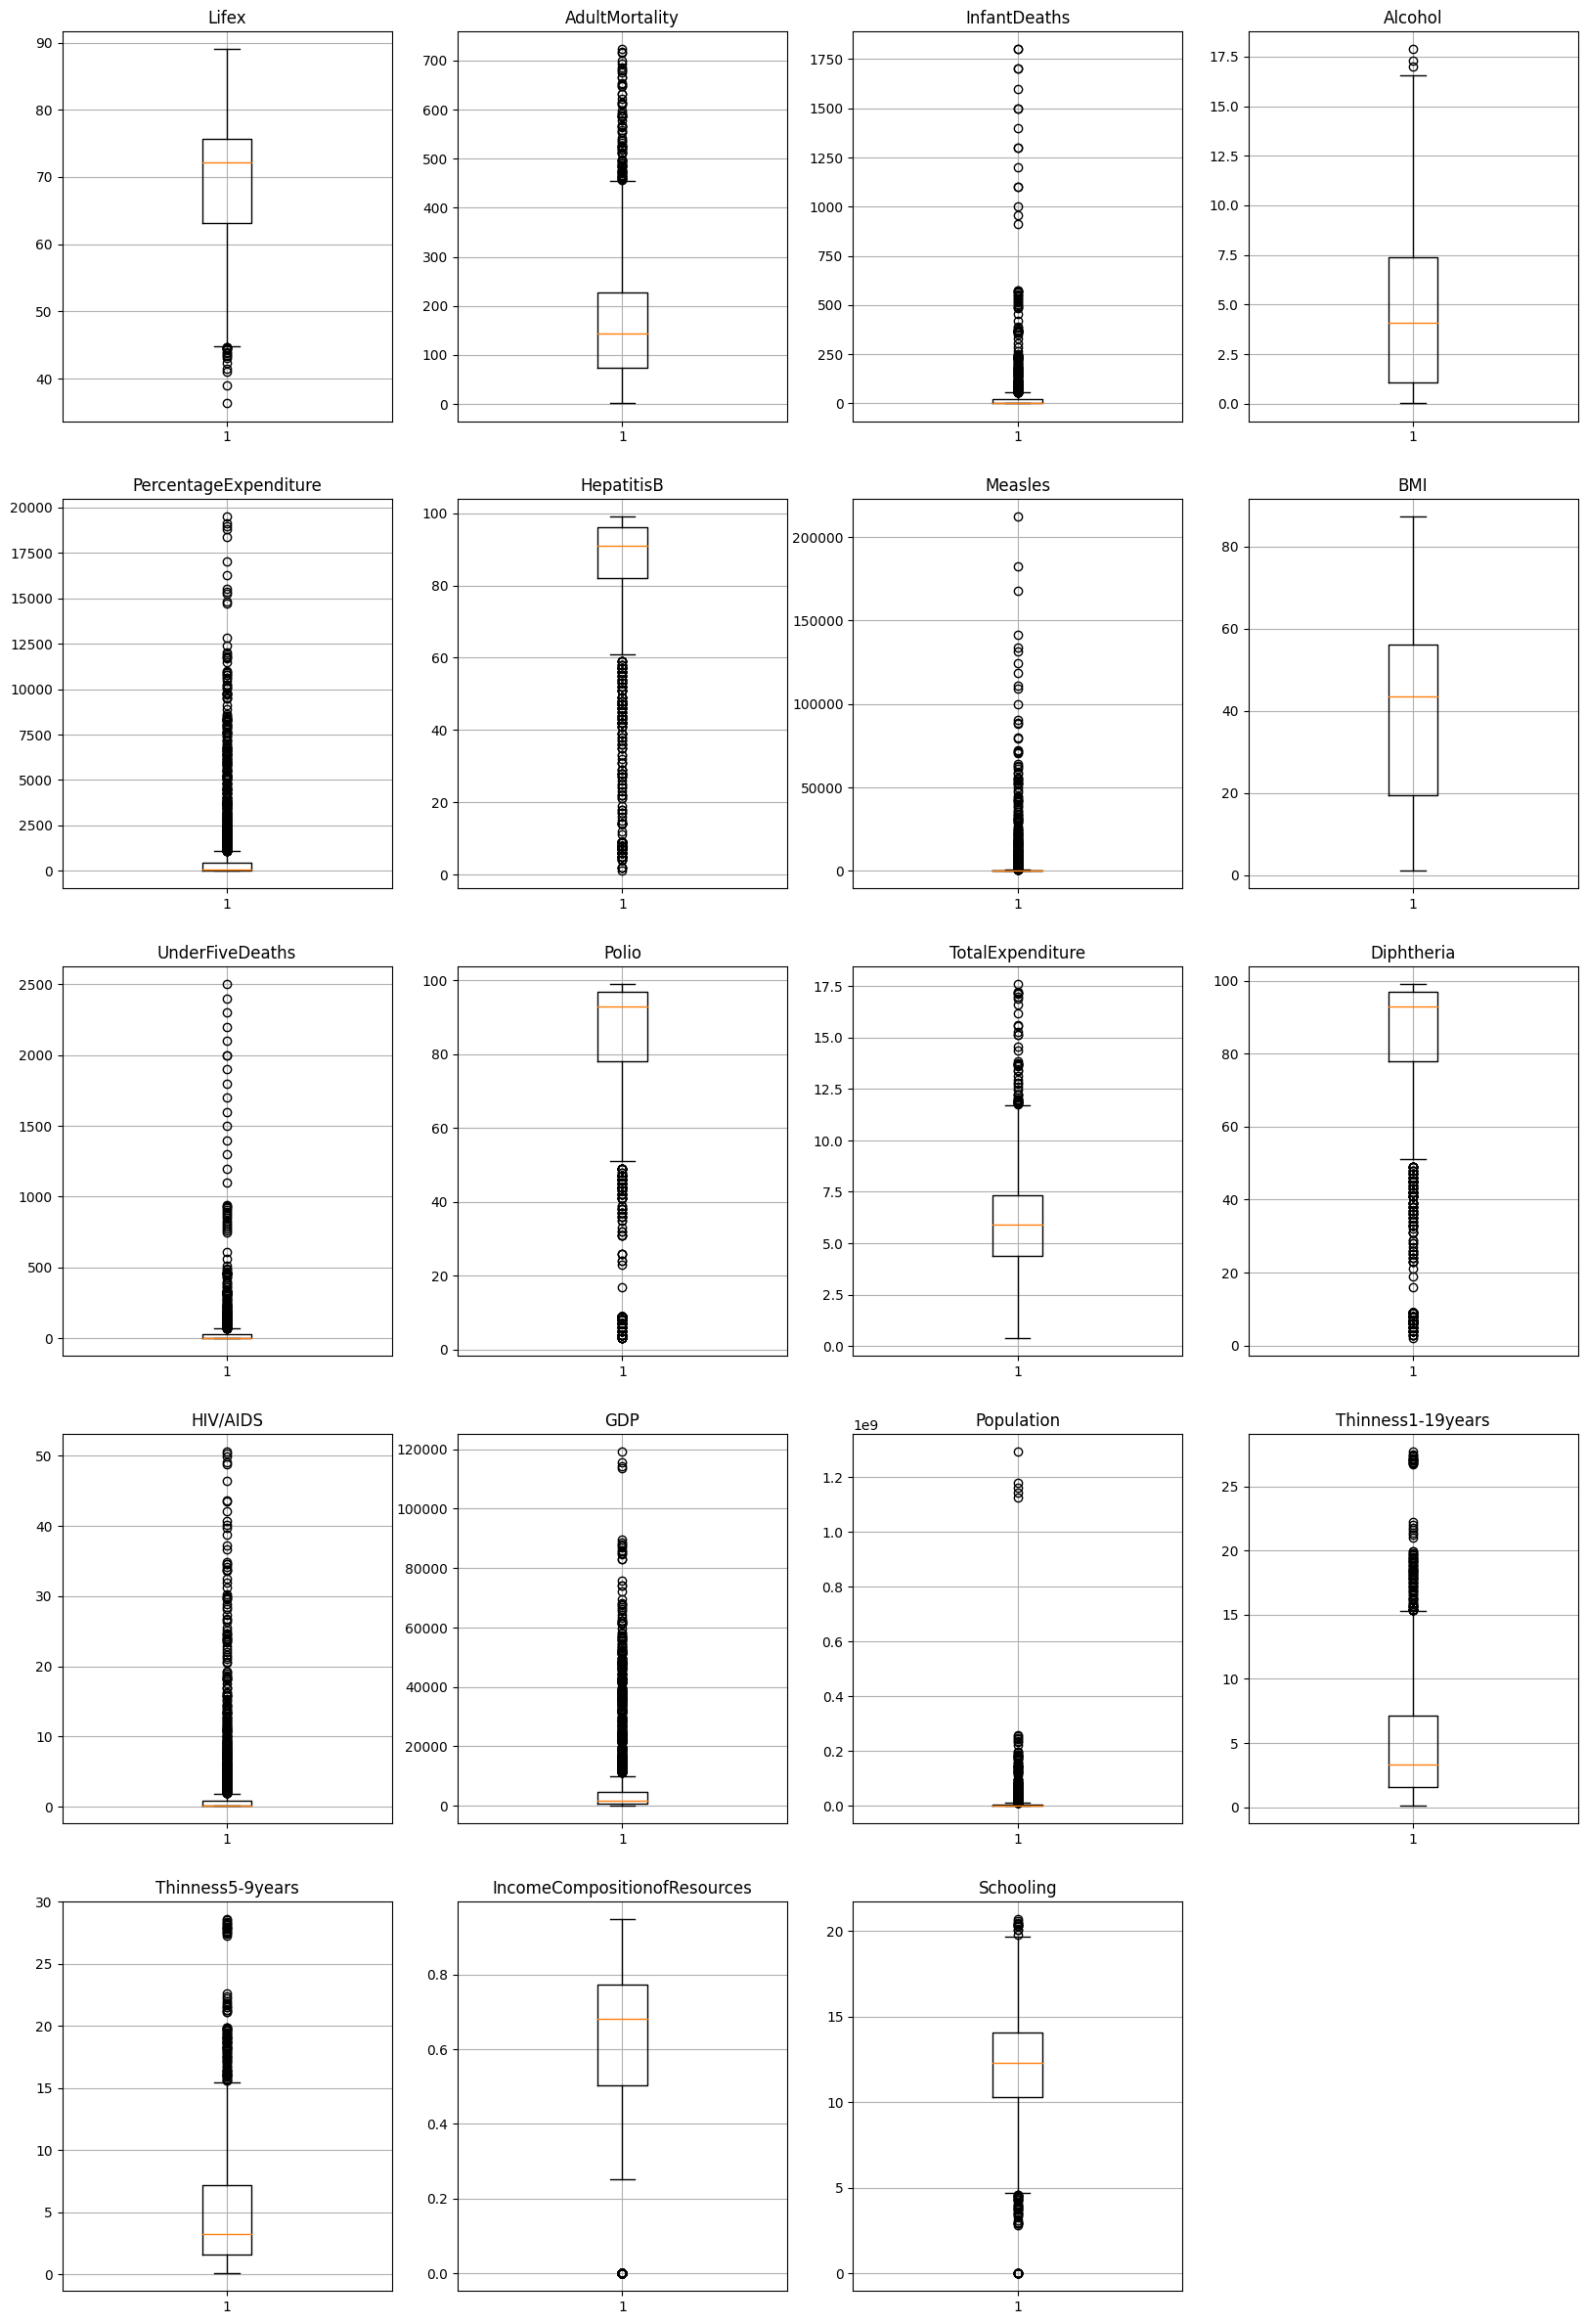

In [13]:
col_dict = {'Lifex':1,'AdultMortality':2,'InfantDeaths':3,'Alcohol':4,'PercentageExpenditure':5,'HepatitisB':6,'Measles':7,'BMI':8,'UnderFiveDeaths':9,'Polio':10,'TotalExpenditure':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'Thinness1-19years':16,'Thinness5-9years':17,'IncomeCompositionofResources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_expectancy[variable])
                     plt.title(variable)
                     plt.grid(True)

plt.show()

# Winsorization

In [15]:
life_expectancy = life_expectancy[life_expectancy['InfantDeaths'] < 1001]
life_expectancy = life_expectancy[life_expectancy['Measles'] < 1001]
life_expectancy = life_expectancy[life_expectancy['UnderFiveDeaths'] < 1001]


life_expectancy = pd.read_csv("/content/Life Expectancy Data.csv", index_col=0)
life_expectancy.drop(['BMI'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


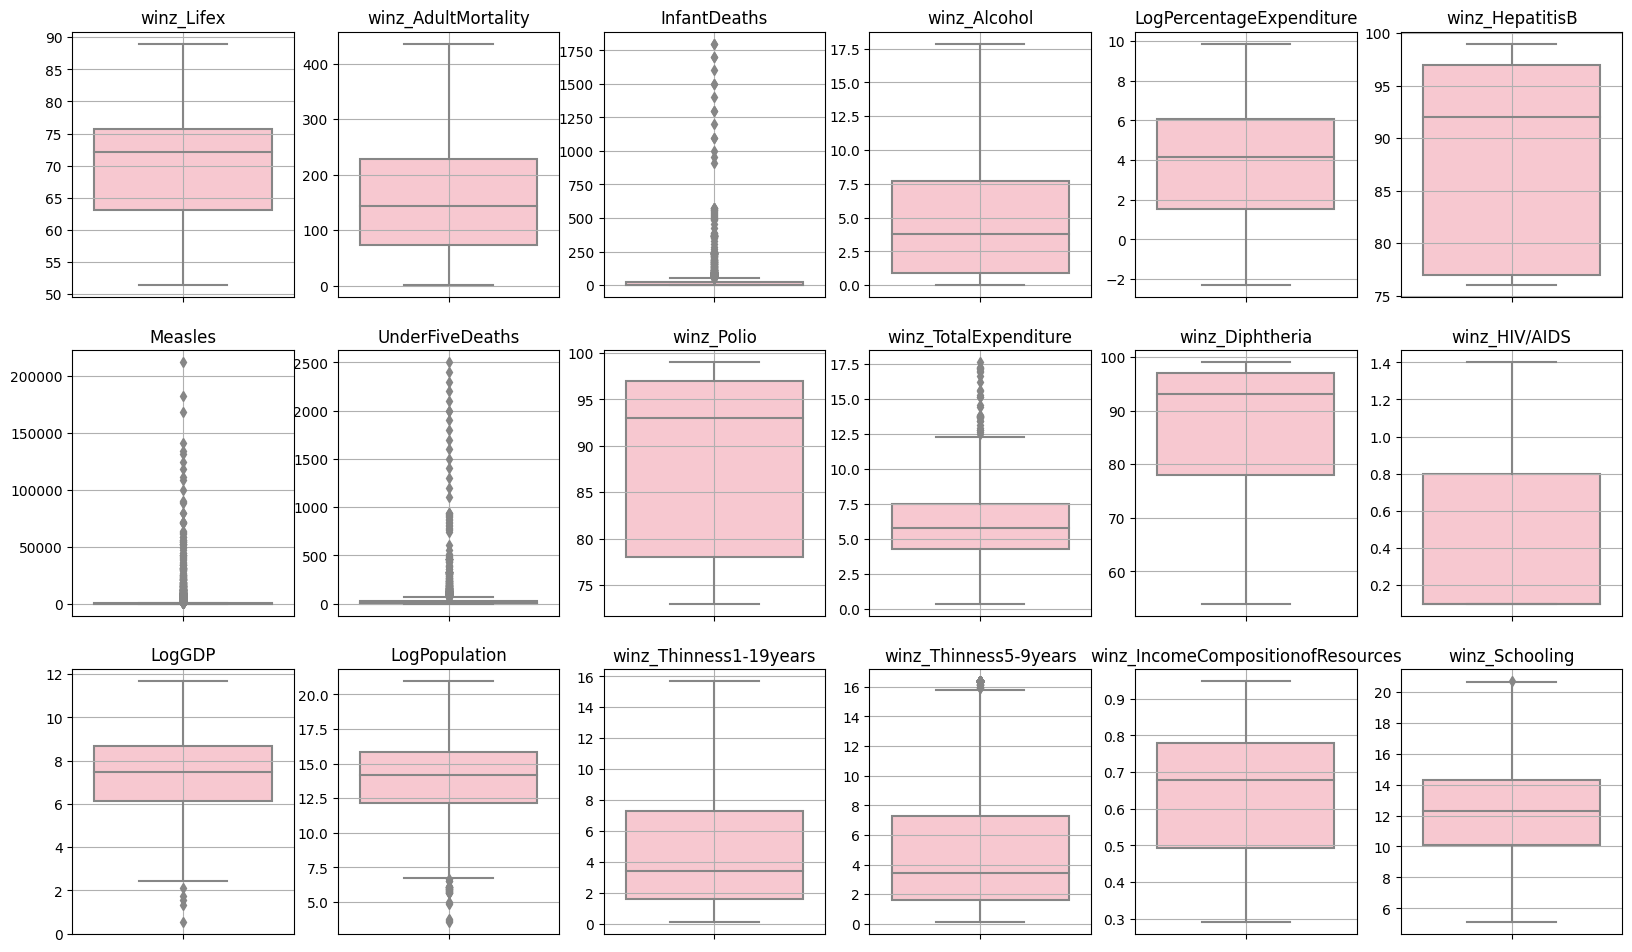

In [16]:
life_expectancy['LogPercentageExpenditure'] = np.log(life_expectancy['PercentageExpenditure'])
life_expectancy['LogPopulation'] = np.log(life_expectancy['Population'])
life_expectancy['LogGDP'] = np.log(life_expectancy['GDP'])
life_expectancy = life_expectancy.replace([np.inf, -np.inf], 0)
life_expectancy['LogPercentageExpenditure']

life_expectancy['winz_Lifex'] = winsorize(life_expectancy['Lifex'], (0.05,0))
life_expectancy['winz_AdultMortality'] = winsorize(life_expectancy['AdultMortality'], (0,0.04))
life_expectancy['winz_Alcohol'] = winsorize(life_expectancy['Alcohol'], (0.0,0.01))
life_expectancy['winz_HepatitisB'] = winsorize(life_expectancy['HepatitisB'], (0.20,0.0))
life_expectancy['winz_Polio'] = winsorize(life_expectancy['Polio'], (0.20,0.0))
life_expectancy['winz_TotalExpenditure'] = winsorize(life_expectancy['TotalExpenditure'], (0.0,0.02))
life_expectancy['winz_Diphtheria'] = winsorize(life_expectancy['Diphtheria'], (0.11,0.0))
life_expectancy['winz_HIV/AIDS'] = winsorize(life_expectancy['HIV/AIDS'], (0.0,0.21))
life_expectancy['winz_Thinness1-19years'] = winsorize(life_expectancy['Thinness1-19years'], (0.0,0.04))
life_expectancy['winz_Thinness5-9years'] = winsorize(life_expectancy['Thinness5-9years'], (0.0,0.04))
life_expectancy['winz_IncomeCompositionofResources'] = winsorize(life_expectancy['IncomeCompositionofResources'], (0.05,0.0))
life_expectancy['winz_Schooling'] = winsorize(life_expectancy['Schooling'], (0.03,0.01))

col_dict_winz = {'winz_Lifex':1,'winz_AdultMortality':2,'InfantDeaths':3,'winz_Alcohol':4,
            'LogPercentageExpenditure':5,'winz_HepatitisB':6,'Measles':7,'UnderFiveDeaths':8,'winz_Polio':9,
            'winz_TotalExpenditure':10,'winz_Diphtheria':11,'winz_HIV/AIDS':12,'LogGDP':13,'LogPopulation':14,
            'winz_Thinness1-19years':15,'winz_Thinness5-9years':16,'winz_IncomeCompositionofResources':17,
            'winz_Schooling':18}


fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     sns.boxplot(y = life_expectancy[variable], color = "pink")
                     plt.title(variable)
                     plt.ylabel('')

                     plt.grid(True)

plt.show()

# Life Expectancy Analysis

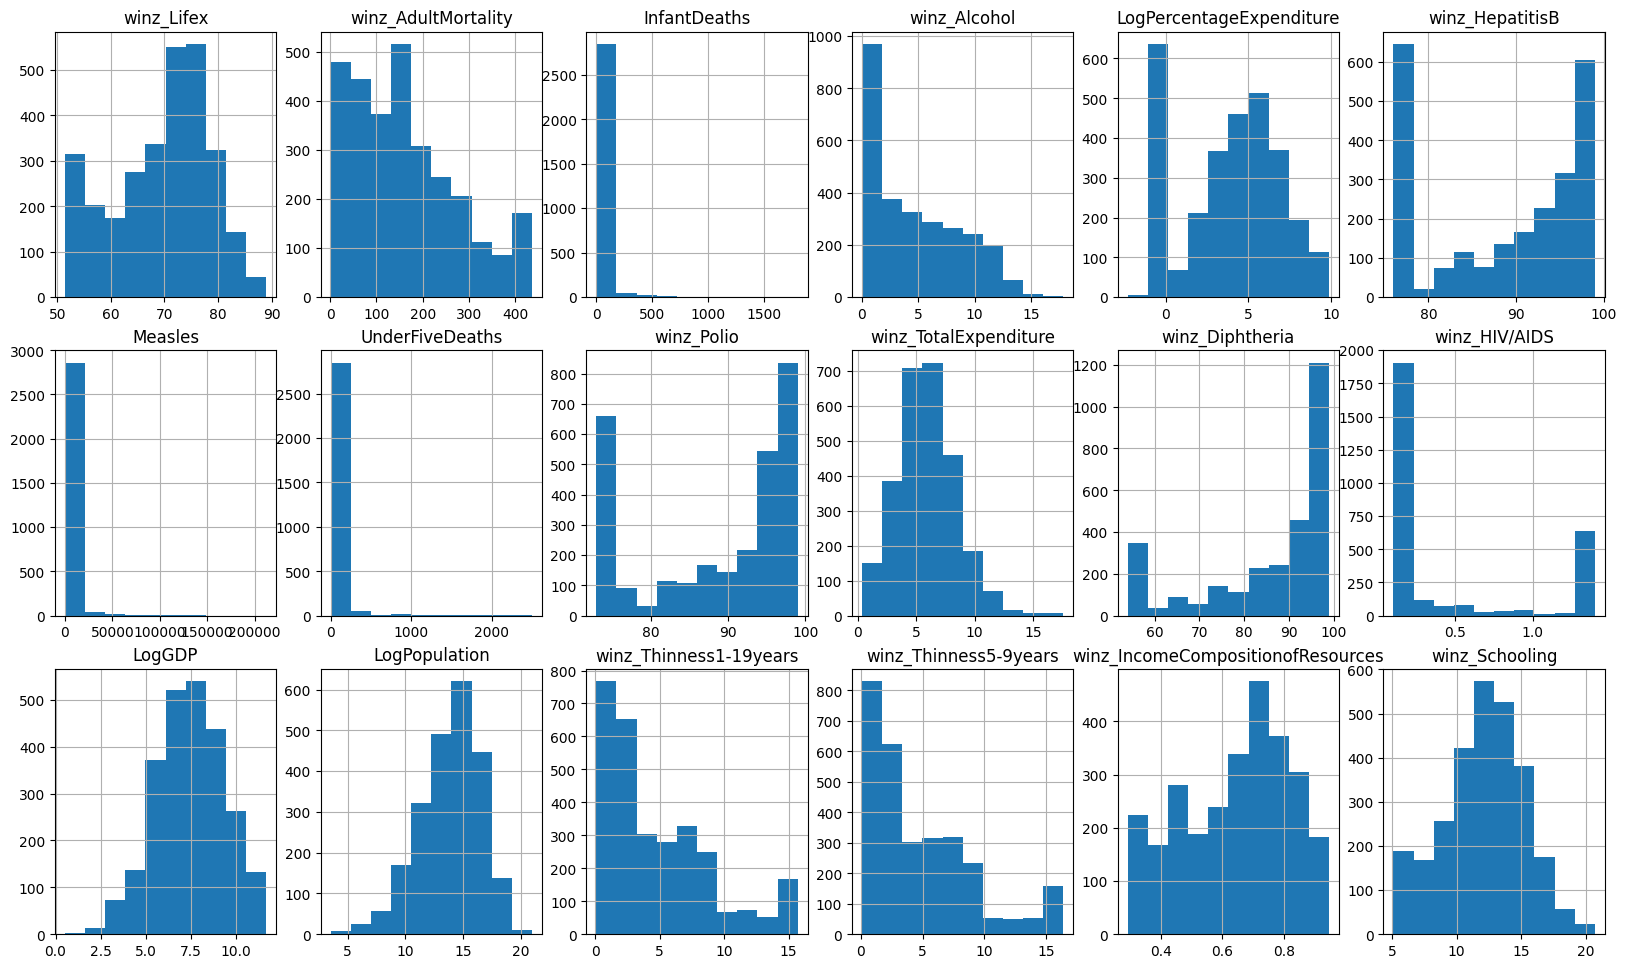

In [17]:
fig = plt.figure(figsize=(20,20))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.hist(life_expectancy[variable])
                     plt.title(variable)
                     plt.ylabel('')

                     plt.grid(True)

plt.show()

In [18]:
life_expectancy.head()

,Year,Status,Lifex,AdultMortality,InfantDeaths,Alcohol,PercentageExpenditure,HepatitisB,Measles,UnderFiveDeaths,...,winz_Alcohol,winz_HepatitisB,winz_Polio,winz_TotalExpenditure,winz_Diphtheria,winz_HIV/AIDS,winz_Thinness1-19years,winz_Thinness5-9years,winz_IncomeCompositionofResources,winz_Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,83,...,0.01,76.0,73.0,8.16,65.0,0.1,15.7,16.4,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,86,...,0.01,76.0,73.0,8.18,62.0,0.1,15.7,16.4,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,89,...,0.01,76.0,73.0,8.13,64.0,0.1,15.7,16.4,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,93,...,0.01,76.0,73.0,8.52,67.0,0.1,15.7,16.4,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,97,...,0.01,76.0,73.0,7.87,68.0,0.1,15.7,16.4,0.454,9.5


<ipython-input-19-2e308214bb32>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)


<Axes: >

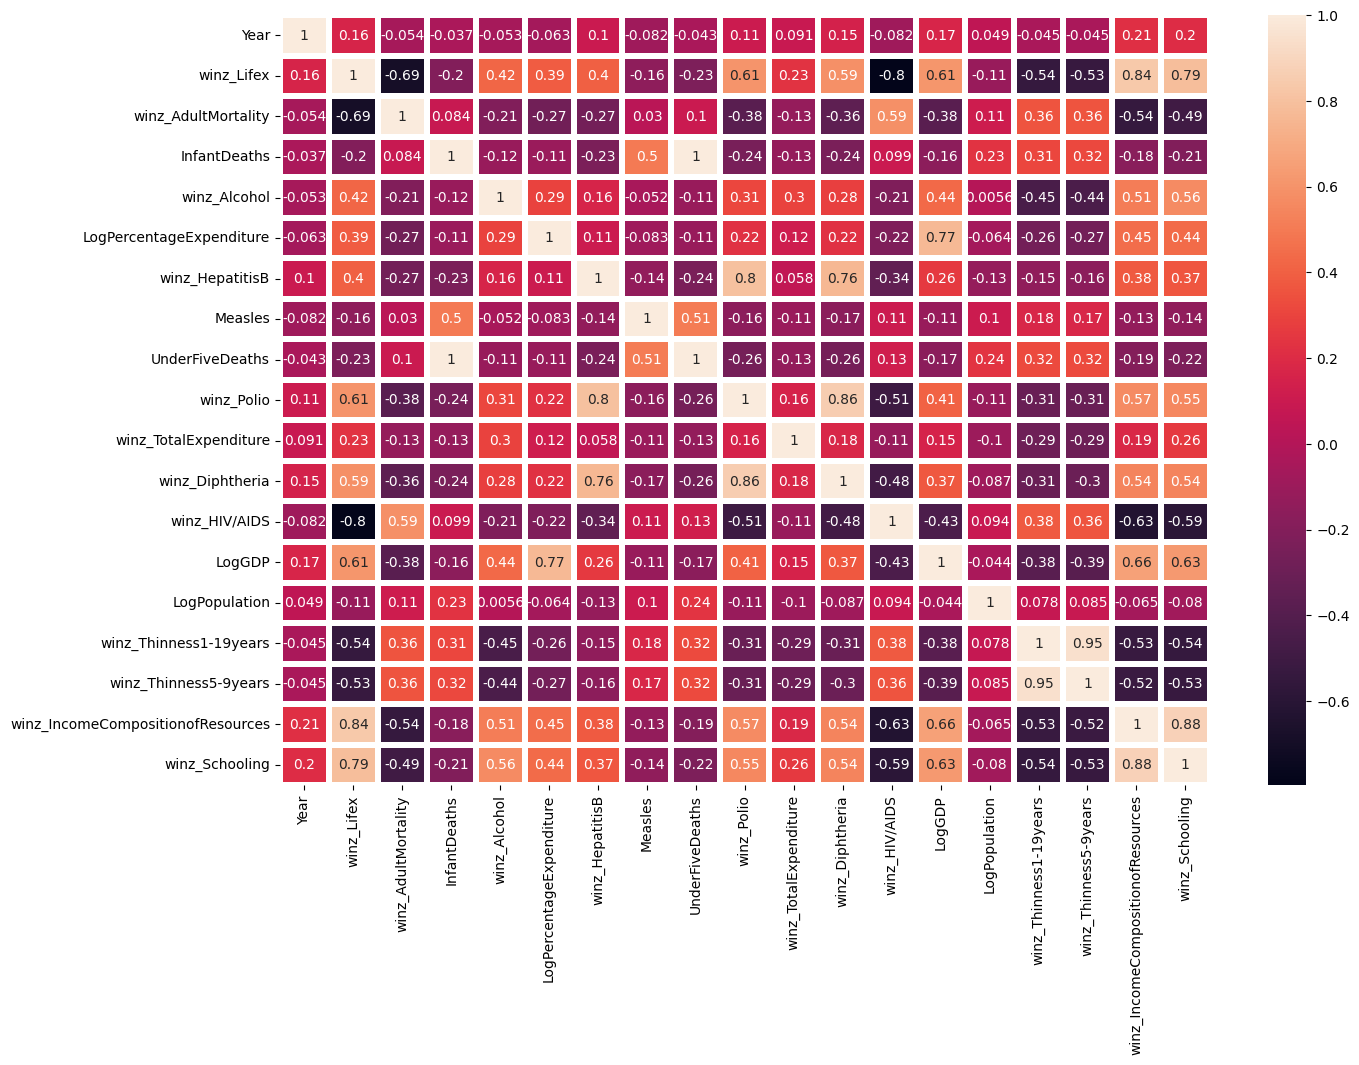

In [19]:
life_exp = life_expectancy[['Year', 'Status', 'winz_Lifex', 'winz_AdultMortality', 'InfantDeaths', 'winz_Alcohol',
            'LogPercentageExpenditure','winz_HepatitisB','Measles','UnderFiveDeaths','winz_Polio',
            'winz_TotalExpenditure','winz_Diphtheria','winz_HIV/AIDS','LogGDP','LogPopulation',
            'winz_Thinness1-19years','winz_Thinness5-9years','winz_IncomeCompositionofResources',
            'winz_Schooling']]
plt.figure(figsize=(15,10))
sns.heatmap(life_exp.corr(), annot =True, linewidths = 4)

In [21]:
status_life_exp = life_expectancy.groupby(by=['Status']).mean().reset_index().sort_values('winz_Lifex',ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,10))

fig = px.bar(status_life_exp, x='Status', y='winz_Lifex',color='winz_Lifex')

fig.update_layout(
        title="Life expectancy according to status",
        xaxis_title="Status",
        yaxis_title="Average Life Expectancy",
        font=dict(
            family="Courier New",
            size=16,
            color="black"
        )
    )
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [22]:
life_year = life_expectancy.groupby(by = ['Year', 'Status']).mean().reset_index()
Developed = life_year.loc[life_year['Status'] == 'Developed',:]
Developing = life_year.loc[life_year['Status'] == 'Developing',:]
fig1 = go.Figure()
for template in ["plotly_dark"]:
    fig1.add_trace(go.Scatter(x=Developing['Year'], y=Developing['winz_Lifex'],
                    mode='lines',
                    name='Developing',
                    marker_color='#f075c2'))
    fig1.add_trace(go.Scatter(x=Developed['Year'], y=Developed['winz_Lifex'],
                    mode='lines',
                    name='Developed',
                    marker_color='#28d2c2'))
    fig1.update_layout(
    height=500,
    xaxis_title="Years",
    yaxis_title='Life expectancy in age',
    title_text='Average Life expectancy of Developing and Developed countries over the years',
    template=template)
fig1.show()